In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./data.csv')

In [4]:
df

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


In [5]:
df.columns

Index(['Order_Date', 'Time', 'Aging', 'Customer_Id', 'Gender', 'Device_Type',
       'Customer_Login_type', 'Product_Category', 'Product', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority',
       'Payment_method'],
      dtype='object')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

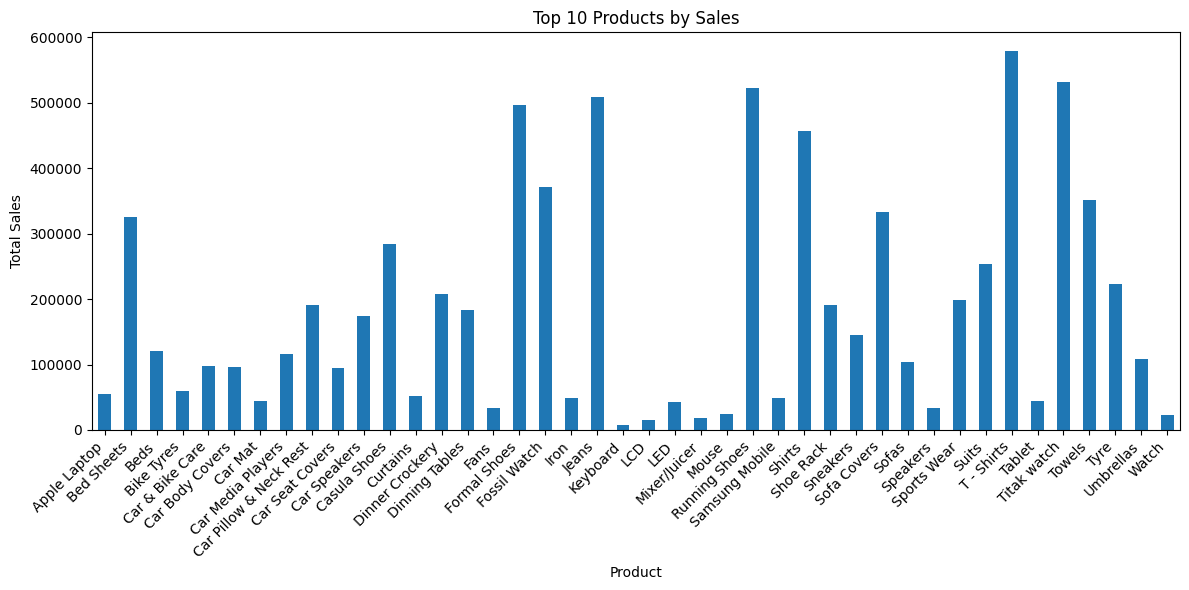

In [8]:
# 1. Bar chart: Top 10 products by sales
product_sales = df.groupby('Product')['Sales'].sum()
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Fashion dominates sales at 55.6%, while Electronics lags at 5.1%.T-shirts are the top-selling product, with fashion items prominent in the top 10.

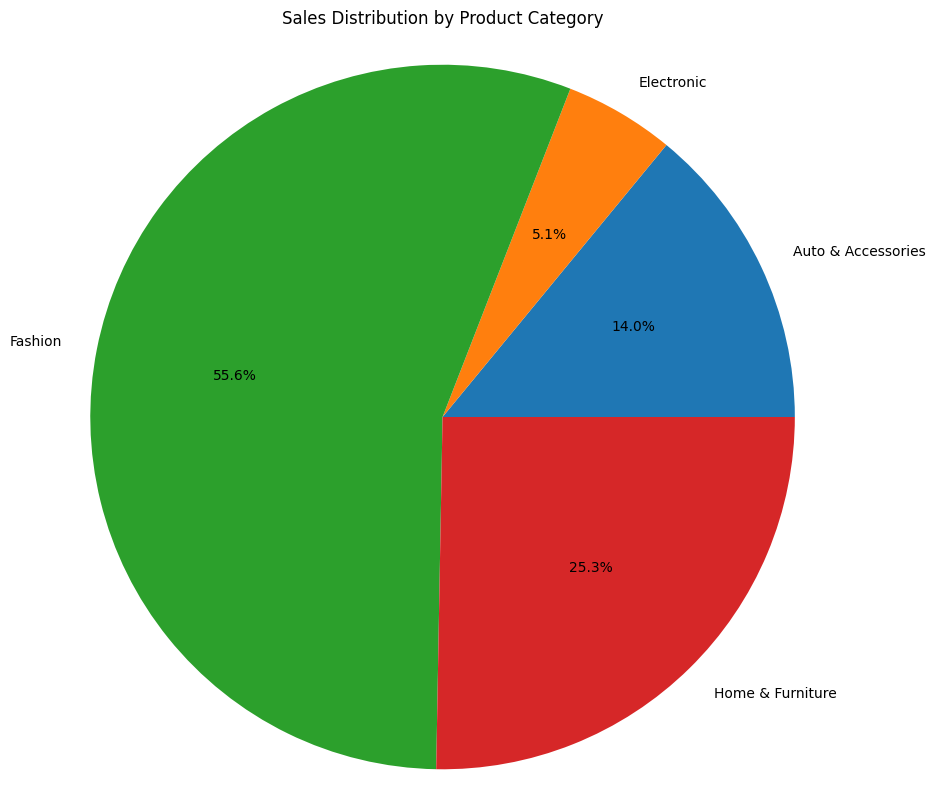

In [9]:
# 2. Pie chart: Sales distribution by Product Category
category_sales = df.groupby('Product_Category')['Sales'].sum()
plt.figure(figsize=(10, 10))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%')
plt.title('Sales Distribution by Product Category')
plt.axis('equal')
plt.show()

Fashion dominates sales at 55.6%, while Electronics lags at 5.1%.

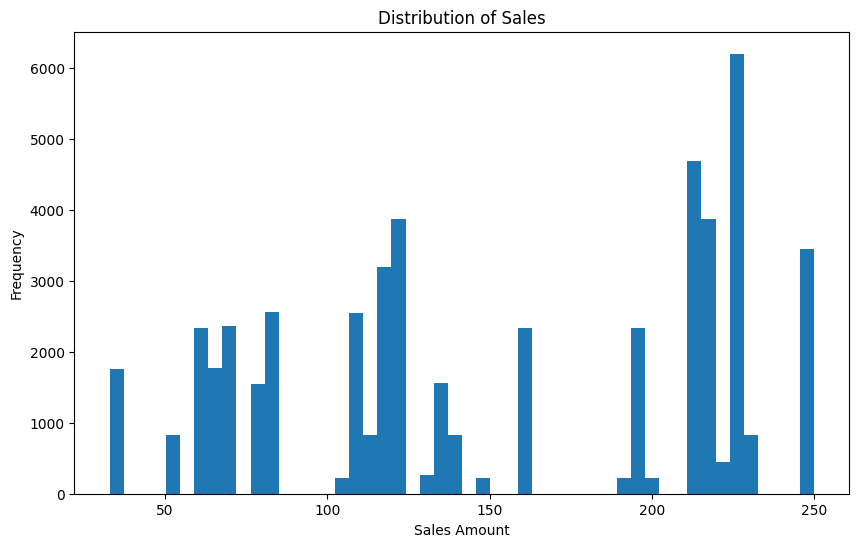

In [10]:
# 3. Histogram: Distribution of Sales
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=50)
plt.title('Distribution of Sales')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

Sales cluster heavily in lower price ranges, with a notable peak around 200-250.

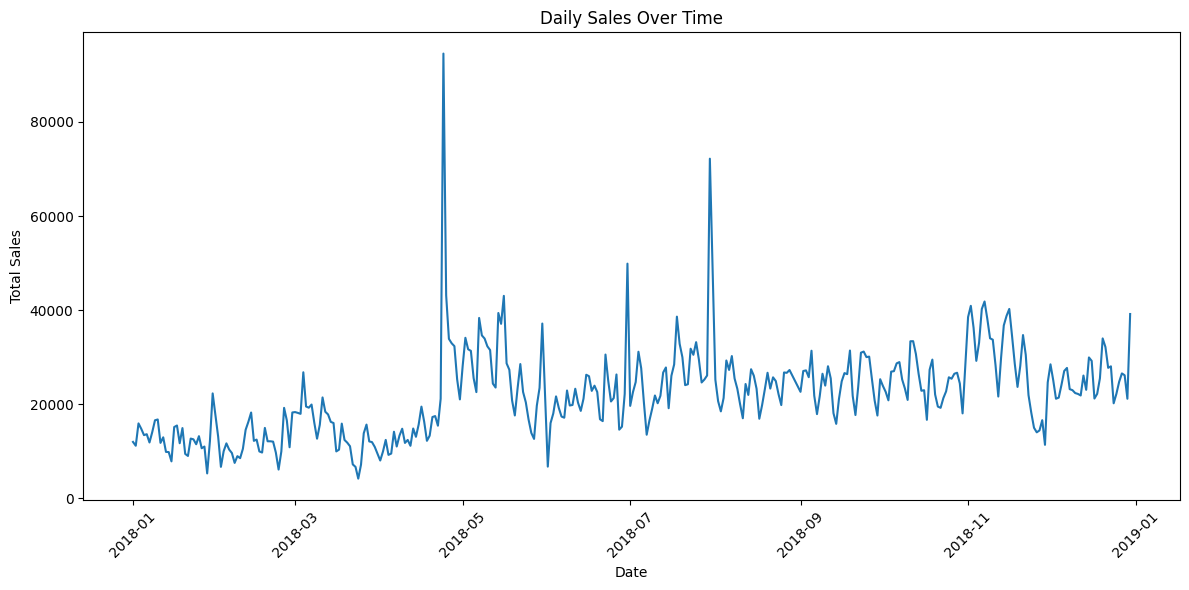

In [11]:
# 4. Timeline chart: Daily sales over time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
daily_sales = df.groupby('Order_Date')['Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Daily sales show high volatility with several major spikes, particularly mid-2018.

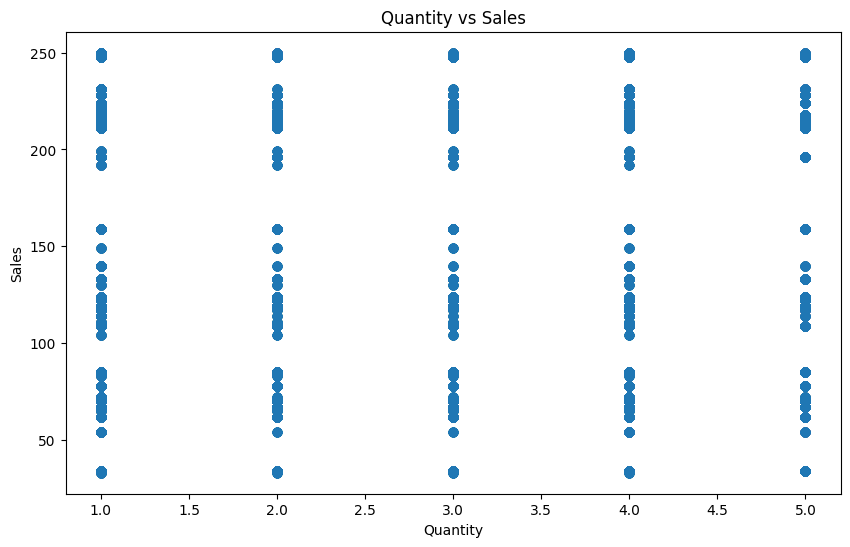

In [12]:
# 5. Scatter plot: Quantity vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['Sales'], alpha=0.5)
plt.title('Quantity vs Sales')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

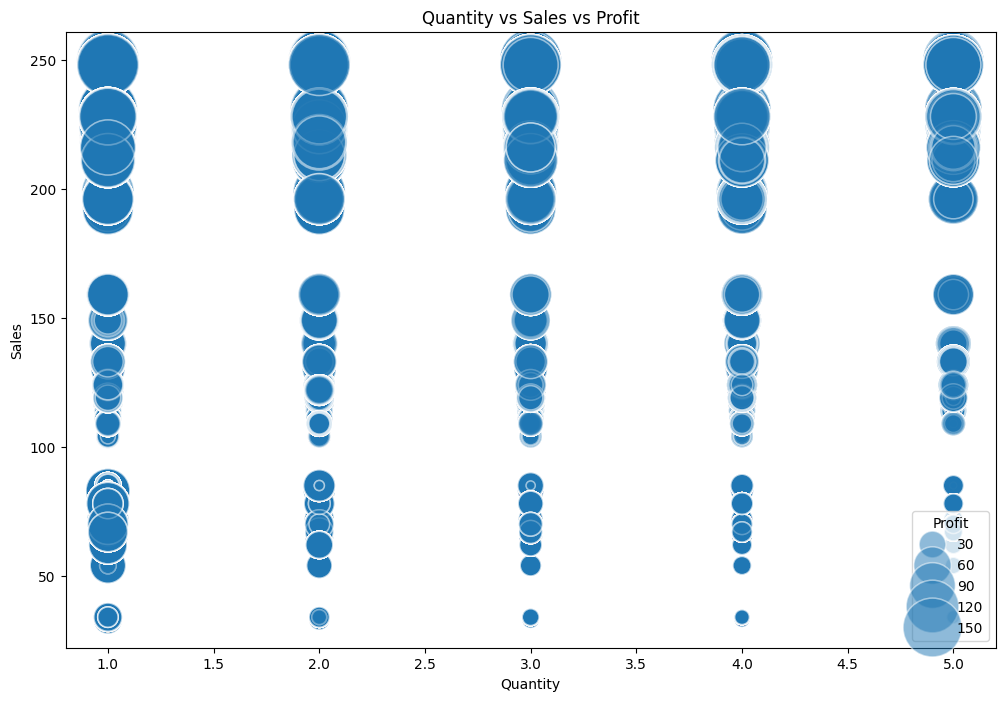

In [13]:
# 6. Bubble plot: Quantity vs Sales vs Profit
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Quantity', y='Sales', size='Profit', sizes=(20, 2000), alpha=0.5)
plt.title('Quantity vs Sales vs Profit')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()

In [14]:
# Calculate Product-wise sales
product_sales = df.groupby('Product').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values('Sales', ascending=False)

print("Product-wise Sales:")
print(product_sales.head())

Product-wise Sales:
               Quantity     Sales    Profit
Product                                    
T - Shirts       5986.0  578336.0  340720.6
Titak watch      6254.0  531468.0  296718.2
Running Shoes    6064.0  522144.0  289097.6
Jeans            5946.0  508376.0  276856.3
Formal Shoes     6154.0  496503.0  265350.7


In [15]:
# Calculate Category-wise sales
category_sales = df.groupby('Product_Category').agg({
    'Quantity': 'sum',
    'Sales': 'sum',
    'Profit': 'sum'
}).sort_values('Sales', ascending=False)

print("\nCategory-wise Sales:")
print(category_sales)


Category-wise Sales:
                    Quantity      Sales     Profit
Product_Category                                  
Fashion              66639.0  4345914.0  2072623.9
Home & Furniture     38190.0  1975831.0   880058.9
Auto & Accessories   17593.0  1096928.0   484313.2
Electronic            5951.0   394738.0   174190.6


In [16]:
# Additional insights
print("\nSales by Device Type:")
print(df.groupby('Device_Type')['Sales'].sum())

print("\nSales by Payment Method:")
print(df.groupby('Payment_method')['Sales'].sum())

print("\nSales by Gender:")
print(df.groupby('Gender')['Sales'].sum())

print("\nAverage Discount by Product Category:")
print(df.groupby('Product_Category')['Discount'].mean())


Sales by Device Type:
Device_Type
Mobile     563340.0
Web       7250071.0
Name: Sales, dtype: float64

Sales by Payment Method:
Payment_method
credit_card    5819379.0
debit_card      109979.0
e_wallet        422750.0
money_order    1461269.0
not_defined         34.0
Name: Sales, dtype: float64

Sales by Gender:
Gender
Female    3504493.0
Male      4308918.0
Name: Sales, dtype: float64

Average Discount by Product Category:
Product_Category
Auto & Accessories    0.214206
Electronic            0.159682
Fashion               0.356036
Home & Furniture      0.285860
Name: Discount, dtype: float64
